In [1]:
# data processing tools
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from math import sqrt
import itertools
from collections import Counter


# model tools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Visualization tools
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from pandas import Int64Index as NumericIndex

/Users/arvinv23/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
chi = pd.read_csv('/Users/arvinv23/Desktop/Udacity DS/Blog Post/listings.csv')
chi.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [3]:
chi.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
chi.shape

(6397, 16)

In [5]:
chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

In [6]:
chi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6397.0,2.813857e+07,1.288337e+07,2384.00000,1.875555e+07,2.994743e+07,3.959279e+07,4.551558e+07
host_id,6397.0,9.850262e+07,9.990222e+07,2140.00000,1.705221e+07,5.738786e+07,1.580558e+08,3.679071e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,6397.0,4.189905e+01,5.892851e-02,41.64736,4.187274e+01,4.190186e+01,4.193978e+01,4.202251e+01
longitude,6397.0,-8.766404e+01,4.241434e-02,-87.84681,-8.768746e+01,-8.766088e+01,-8.763316e+01,-8.753752e+01
price,6397.0,1.530200e+02,3.762077e+02,0.00000,6.400000e+01,9.900000e+01,1.550000e+02,1.000000e+04
minimum_nights,6397.0,8.113178e+00,2.278686e+01,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+02
number_of_reviews,6397.0,4.275379e+01,6.705161e+01,0.00000,2.000000e+00,1.500000e+01,5.600000e+01,6.320000e+02
reviews_per_month,5265.0,1.745280e+00,1.745491e+00,0.02000,4.300000e-01,1.230000e+00,2.570000e+00,3.243000e+01
calculated_host_listings_count,6397.0,1.359872e+01,3.718057e+01,1.00000,1.000000e+00,2.000000e+00,7.000000e+00,2.050000e+02


In [7]:
chi=chi.drop(columns=['neighbourhood_group'])
chi = chi.fillna(0)
#Decided to drop this column because all of the values were null

In [8]:
chi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6397.0,2.813857e+07,1.288337e+07,2384.00000,1.875555e+07,2.994743e+07,3.959279e+07,4.551558e+07
host_id,6397.0,9.850262e+07,9.990222e+07,2140.00000,1.705221e+07,5.738786e+07,1.580558e+08,3.679071e+08
latitude,6397.0,4.189905e+01,5.892851e-02,41.64736,4.187274e+01,4.190186e+01,4.193978e+01,4.202251e+01
longitude,6397.0,-8.766404e+01,4.241434e-02,-87.84681,-8.768746e+01,-8.766088e+01,-8.763316e+01,-8.753752e+01
price,6397.0,1.530200e+02,3.762077e+02,0.00000,6.400000e+01,9.900000e+01,1.550000e+02,1.000000e+04
minimum_nights,6397.0,8.113178e+00,2.278686e+01,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+02
number_of_reviews,6397.0,4.275379e+01,6.705161e+01,0.00000,2.000000e+00,1.500000e+01,5.600000e+01,6.320000e+02
reviews_per_month,6397.0,1.436439e+00,1.717909e+00,0.00000,1.500000e-01,8.500000e-01,2.220000e+00,3.243000e+01
calculated_host_listings_count,6397.0,1.359872e+01,3.718057e+01,1.00000,1.000000e+00,2.000000e+00,7.000000e+00,2.050000e+02
availability_365,6397.0,1.742722e+02,1.388776e+02,0.00000,3.600000e+01,1.610000e+02,3.290000e+02,3.650000e+02


In [9]:
chi.shape

(6397, 15)

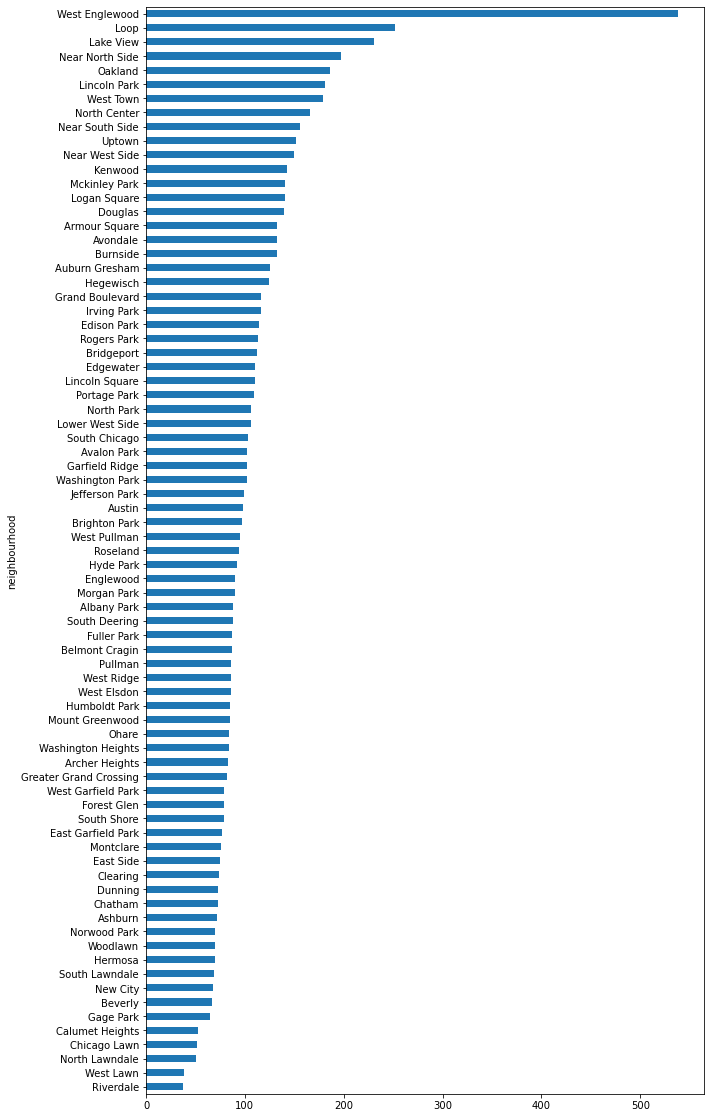

In [10]:
chi.groupby('neighbourhood').mean()['price'].sort_values(ascending=True).plot(kind='barh', figsize=(10,20));

In [11]:
chi.loc[chi['neighbourhood']=='West Englewood']
#West Englewood upon further analysis has few stays and 1 really high price that seems to be skewing the data. Let's drop it

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3898,35194693,It's the life of the party,246840698,Shay,West Englewood,41.76791,-87.65921,Entire home/apt,1500,3,0,0,0.00,1,83
4308,37596429,Real place's west 2nd floor space,262478769,Don,West Englewood,41.77095,-87.67386,Private room,55,1,2,2019-10-14,0.16,4,363
4544,38608061,The real place's 2nd floor East Bedroom Suite,262478769,Don,West Englewood,41.77161,-87.67260,Private room,58,1,0,0,0.00,4,365


In [12]:
chi = chi.drop(chi[(chi.neighbourhood=='West Englewood') & (chi.price==1500)].index)

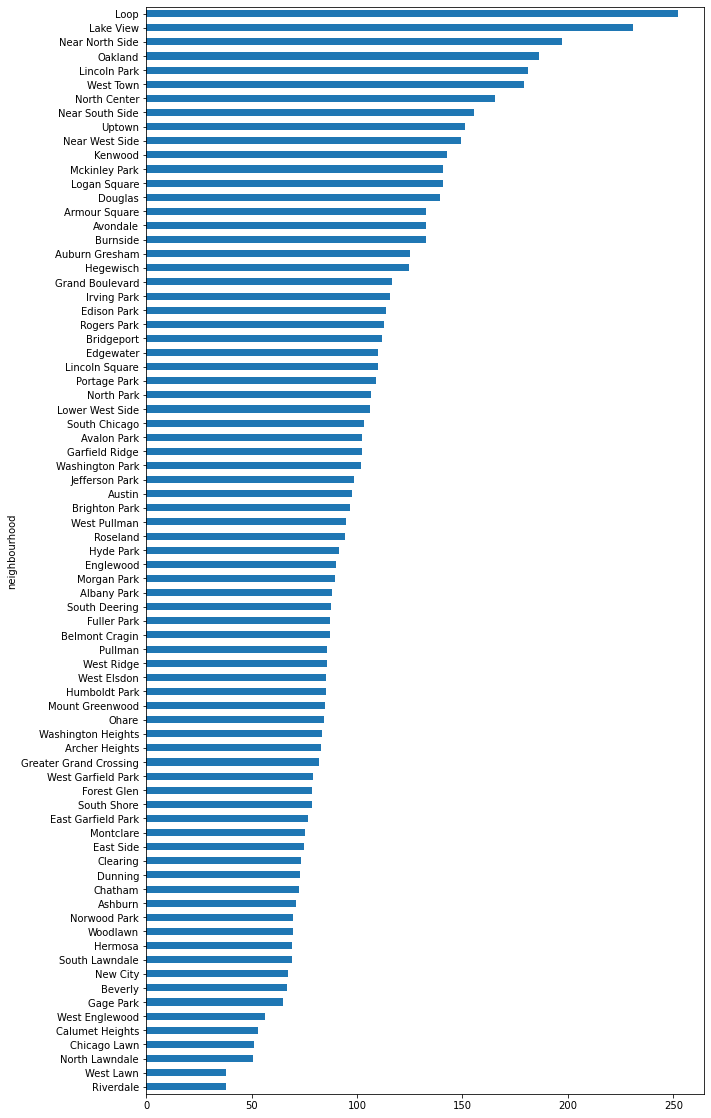

In [13]:
chi.groupby('neighbourhood').mean()['price'].sort_values(ascending=True) \
.plot(kind='barh', x='Neighbourhood', y='Average Price', figsize=(10,20));

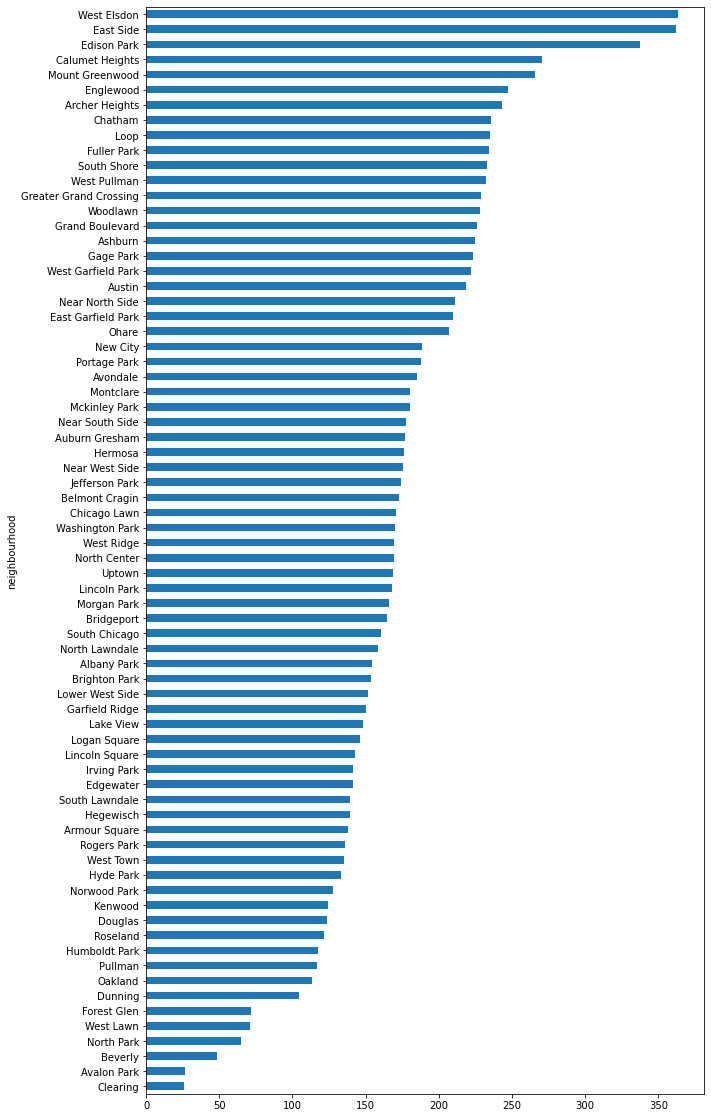

In [51]:
chi.where(chi['room_type'] == 'Entire home/apt').where(chi['price'] < 150).groupby('neighbourhood').mean()['availability_365'] \
.sort_values(ascending=True).plot(kind='barh', figsize=(10,20));

In [35]:
chi.where(chi['room_type'] == 'Entire home/apt').where(chi['price'] < 125) \
.groupby('neighbourhood').mean()['availability_365'].sort_values(ascending=True)[['Loop','Lincoln Park', 'Near North Side', 'West Town']].to_frame()

,availability_365
neighbourhood,
Loop,215.577236
Lincoln Park,149.000000
Near North Side,193.527778
West Town,125.688797


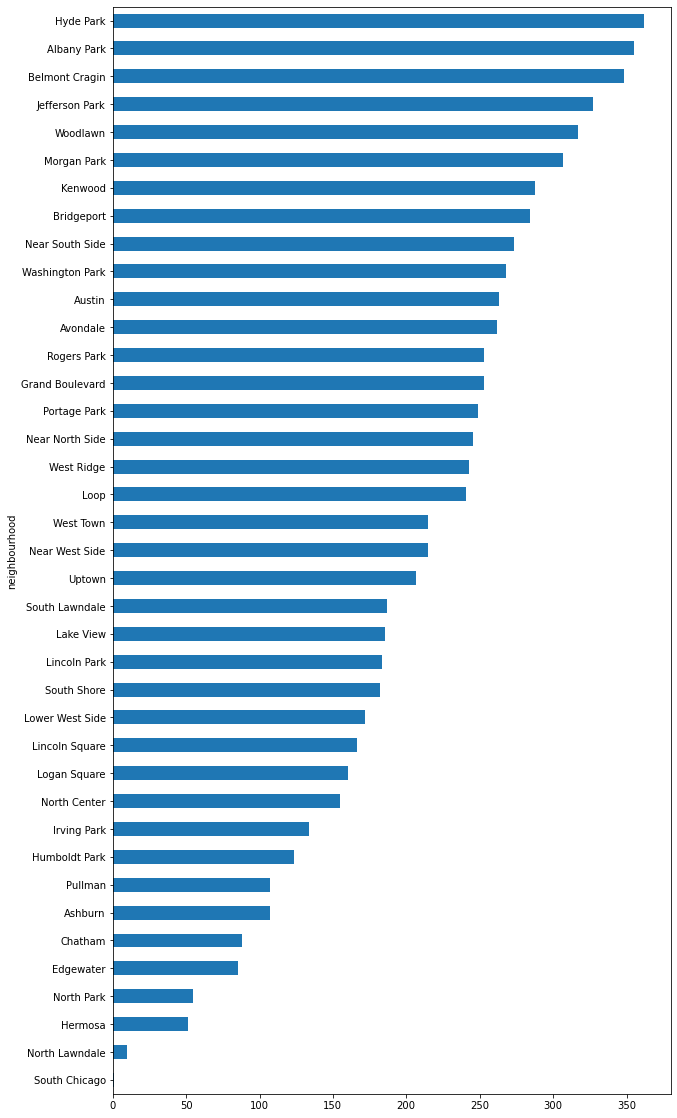

In [54]:
chi[(chi['room_type'] == 'Entire home/apt') & (chi['price'] < 125) & (chi['minimum_nights'] > 7)] \
.groupby('neighbourhood').mean()['availability_365'].sort_values(ascending=True).plot(kind='barh', figsize=(10,20));

In [58]:
chi[(chi['room_type'] == 'Entire home/apt') & (chi['price'] < 125) & (chi['minimum_nights'] > 10)] \
.groupby('neighbourhood').mean()['availability_365'].sort_values(ascending=True) \
[['Loop','Lincoln Park', 'Near North Side', 'West Town']]

neighbourhood
Loop               240.564706
Lincoln Park       194.875000
Near North Side    246.692308
West Town          214.947368
Name: availability_365, dtype: float64

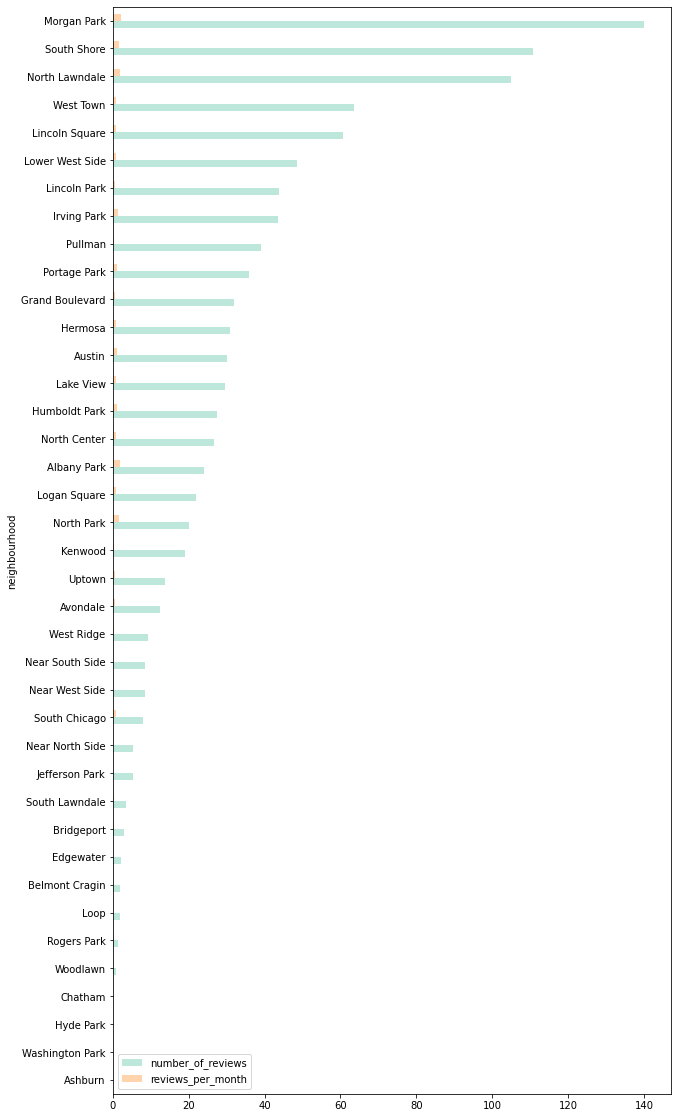

In [127]:
chi[(chi['room_type'] == 'Entire home/apt') & (chi['price'] < 125) & (chi['minimum_nights'] > 7)] \
.groupby('neighbourhood').mean()[['number_of_reviews', 'reviews_per_month']] \
.sort_values(ascending=True, by='number_of_reviews').plot.barh(figsize=(10,20), colormap='icefire');